In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
df=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-7-SL_classification/US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [112]:
dfn=df.dropna()
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
male               3658 non-null int64
age                3658 non-null int64
education          3658 non-null float64
currentSmoker      3658 non-null int64
cigsPerDay         3658 non-null float64
BPMeds             3658 non-null float64
prevalentStroke    3658 non-null int64
prevalentHyp       3658 non-null int64
diabetes           3658 non-null int64
totChol            3658 non-null float64
sysBP              3658 non-null float64
diaBP              3658 non-null float64
BMI                3658 non-null float64
heartRate          3658 non-null float64
glucose            3658 non-null float64
TenYearCHD         3658 non-null int64
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [113]:
for i in dfn.columns:
    print(i)
    print(dfn[i].nunique())
    print()

male
2

age
39

education
4

currentSmoker
2

cigsPerDay
33

BPMeds
2

prevalentStroke
2

prevalentHyp
2

diabetes
2

totChol
241

sysBP
231

diaBP
142

BMI
1298

heartRate
72

glucose
138

TenYearCHD
2



In [114]:
lst=['male','education','currentSmoker','BPMeds','prevalentStroke','diabetes','prevalentHyp']
df1=pd.get_dummies(dfn,columns=lst,drop_first=True)


In [115]:
for i in df1.columns:
    print(i)
    print(df1[i].nunique())
    print()

age
39

cigsPerDay
33

totChol
241

sysBP
231

diaBP
142

BMI
1298

heartRate
72

glucose
138

TenYearCHD
2

male_1
2

education_2.0
2

education_3.0
2

education_4.0
2

currentSmoker_1
2

BPMeds_1.0
2

prevalentStroke_1
2

diabetes_1
2

prevalentHyp_1
2



In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 18 columns):
age                  3658 non-null int64
cigsPerDay           3658 non-null float64
totChol              3658 non-null float64
sysBP                3658 non-null float64
diaBP                3658 non-null float64
BMI                  3658 non-null float64
heartRate            3658 non-null float64
glucose              3658 non-null float64
TenYearCHD           3658 non-null int64
male_1               3658 non-null uint8
education_2.0        3658 non-null uint8
education_3.0        3658 non-null uint8
education_4.0        3658 non-null uint8
currentSmoker_1      3658 non-null uint8
BPMeds_1.0           3658 non-null uint8
prevalentStroke_1    3658 non-null uint8
diabetes_1           3658 non-null uint8
prevalentHyp_1       3658 non-null uint8
dtypes: float64(7), int64(2), uint8(9)
memory usage: 317.9 KB


In [117]:
y=df1['TenYearCHD']
X=df1.drop(columns=['TenYearCHD'],axis=1)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()

In [119]:
models=[]
models.append(('logistic_regression',lr))
models.append(('decission_tree',dt))
models

[('logistic_regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('decission_tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best'))]

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

C:\sajan\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\sajan\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\sajan\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\sajan\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\sajan\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\sajan\lib\site-packages\sklearn\linear_model\lo

logistic_regression:0.725533 (0.001043)
decission_tree:0.560407 (0.001080)


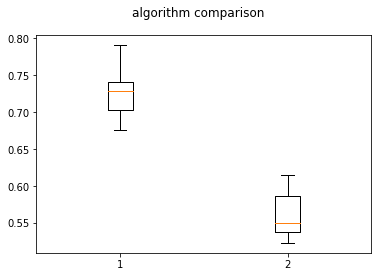

In [121]:
results=[]
names=[]

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')  ## no need of train and test as kfold 
                                                                    ##internally will divide train and test for calculation.
                                                                    # no of rows/(n_splits=10). 9 will be train, 1 will be test.
                                                                    #.fit() and .predict happens internally.
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()
    

inference:
    we can see the spread of model 2 is more than spread of model 1.
    median of model 1 is much higher than that of model 2 indication average auc score of model 1 is better than model 2.

In [122]:
results    ##average of this results are taken into account as auc score. 1st array is logistic and second one is decission tree.

[array([0.74453523, 0.73392007, 0.67503675, 0.72323882, 0.71982571,
        0.74217855, 0.69642569, 0.73525943, 0.69461171, 0.79029541]),
 array([0.53708616, 0.61504611, 0.55977462, 0.52282958, 0.52875817,
        0.54710953, 0.55245902, 0.59591195, 0.541087  , 0.60400988])]

#we can see the variance of the decission tree model while using gini index.
no same steps can be used for entropy. 
which ever gives very less variance is auc scores can be selected as the final hyperparameter.

In [123]:
dt.feature_importances_

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X,y)

In [ ]:
pd.DataFrame(dt.feature_importances_,index=X.columns)

In [ ]:
5/8

## doing regularization to understand the effect

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dtr=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=2)   ##do randomsearch cv for best results.


In [ ]:
models=[]
models.append(('logistic_regression',lr))
models.append(('decission_tree',dt))
models.append(('regularized_dt',dtr))
models

In [ ]:
results=[]
names=[]

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')  ## no need of train and test as kfold 
                                                                    ##internally will divide train and test for calculation.
                                                                    # no of rows/(n_splits=10). 9 will be train, 1 will be test.
                                                                    #.fit() and .predict happens internally.
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()
    

# Random forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dtr=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=2)   ##do randomsearch cv for best results.
rf=RandomForestClassifier()


In [ ]:
models=[]
models.append(('logistic_regression',lr))
models.append(('decission_tree',dt))
models.append(('regularized_dt',dtr))
models.append(('random_forrest',rf))

In [ ]:
results=[]
names=[]

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')  ## no need of train and test as kfold 
                                                                    ##internally will divide train and test for calculation.
                                                                    # no of rows/(n_splits=10). 9 will be train, 1 will be test.
                                                                    #.fit() and .predict happens internally.
                                                                    #always specify scoring='roc_auc'. by defaut its acuuracy.
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()
    

inference
we can see the variance accuracy has been increased from the regularized decission tree.
variance of regularized decisison tree was (0.001753)
it has reduced to .000742 in random forrest. hence we can say random forrest reduces variance error.

# new dataset - KNN

In [ ]:
df=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-8-USL_classification - Copy/inlass/day2/column_2C_weka-1.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df['class']=df['class'].replace({'Abnormal':0,'Normal':1})

In [ ]:
df['class'].value_counts()

In [ ]:
y=df['class']
x=df.drop(columns='class',axis=1)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

params={'n_neighbors':np.arange(1,50),
    'weights':['uniform','distance']}

from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gs.fit(x,y)

In [ ]:
gs.best_params_

In [ ]:
knn=KNeighborsClassifier({'n_neighbors': 21, 'weights': 'distance'})
kfold=KFold(shuffle=True,n_splits=10,random_state=1)
cv_results=cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')  ## no need of train and test as kfold 
                                                                    ##internally will divide train and test for calculation.
                                                                    # no of rows/(n_splits=10). 9 will be train, 1 will be test.
                                                                    #.fit() and .predict happens internally.
                                                                    #always specify scoring='roc_auc'. by defaut its acuuracy.
result=cv_results

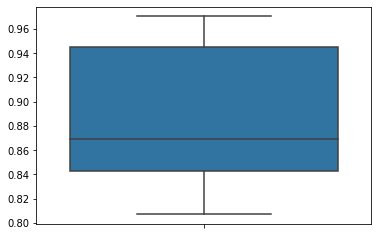

In [124]:
sns.boxplot(y=result)
plt.show()

In [125]:
print(np.mean(result))
print(np.var(result))

0.8869037074037074
0.003348787976307498


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# trying all algorithms and its bagging effect

In [214]:
df1.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,diabetes_1,prevalentHyp_1
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0,0,1,0,0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0,0,0,0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0,1,0,0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0,1,0,0,0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0,1,0,0,0,0


In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 18 columns):
age                  3658 non-null int64
cigsPerDay           3658 non-null float64
totChol              3658 non-null float64
sysBP                3658 non-null float64
diaBP                3658 non-null float64
BMI                  3658 non-null float64
heartRate            3658 non-null float64
glucose              3658 non-null float64
TenYearCHD           3658 non-null int64
male_1               3658 non-null uint8
education_2.0        3658 non-null uint8
education_3.0        3658 non-null uint8
education_4.0        3658 non-null uint8
currentSmoker_1      3658 non-null uint8
BPMeds_1.0           3658 non-null uint8
prevalentStroke_1    3658 non-null uint8
diabetes_1           3658 non-null uint8
prevalentHyp_1       3658 non-null uint8
dtypes: float64(7), int64(2), uint8(9)
memory usage: 317.9 KB


In [216]:
y=df1['TenYearCHD']
x=df1.drop(columns=['TenYearCHD'],axis=1)

In [217]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_std=ss.fit_transform(x)
y_std=y.copy()

In [218]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()



In [219]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()

##### knn

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [221]:
params={'n_neighbors':np.arange(1,100),
    'weights':['uniform','distance']}


from sklearn.model_selection import GridSearchCV
gs_knn=GridSearchCV(knn,param_grid=params,scoring='roc_auc',cv=5)
gs_knn.fit(x_std,y_std)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispat

In [222]:
gs_knn.best_params_

{'n_neighbors': 98, 'weights': 'distance'}

##### DT

In [223]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',)


params={'criterion':['gini','entropy'],}


from sklearn.model_selection import GridSearchCV
gs_dt=GridSearchCV(dt,param_grid=params,scoring='roc_auc',cv=5)
gs_dt.fit(x_std,y_std)





GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [224]:
gs_dt.best_params_

{'criterion': 'gini'}

##### RF

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


params={'n_estimators':np.arange(1,20),'criterion':['gini','entropy']}


from sklearn.model_selection import GridSearchCV
gs_rf=GridSearchCV(rf,param_grid=params,scoring='roc_auc',cv=5)
gs_rf.fit(x_std,y_std)





GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [226]:
gs_rf.best_params_

{'criterion': 'gini', 'n_estimators': 17}

# making bagging classifier for all the above models:

In [227]:
lr=LogisticRegression()
nb=BernoulliNB()
knn=KNeighborsClassifier(**gs_knn.best_params_)
dt=DecisionTreeClassifier(**gs_dt.best_params_)
rf=RandomForestClassifier(**gs_rf.best_params_)


from sklearn.ensemble import BaggingClassifier
lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=10)
nb_bag=BaggingClassifier(base_estimator=nb,n_estimators=10)
knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=10)
dt_bag=BaggingClassifier(base_estimator=dt,n_estimators=10)
rf_bag=BaggingClassifier(base_estimator=rf,n_estimators=10)

In [228]:
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
    
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))

models.append(('lr bagged',lr_bag))
models.append(('nb bagged',nb_bag))
models.append(('knn bagged',knn_bag))
models.append(('dt bagged',dt_bag))
models.append(('RF bagged',rf_bag))


logistic_regression:0.731311 (0.001000)
Naive Bayes:0.701377 (0.000744)
knn:0.708677 (0.000705)
decission tree:0.560020 (0.001116)
rf:0.674102 (0.000476)
lr bagged:0.731165 (0.000989)
nb bagged:0.702195 (0.000664)
knn bagged:0.709806 (0.000801)
dt bagged:0.653098 (0.001985)
RF bagged:0.706307 (0.000852)


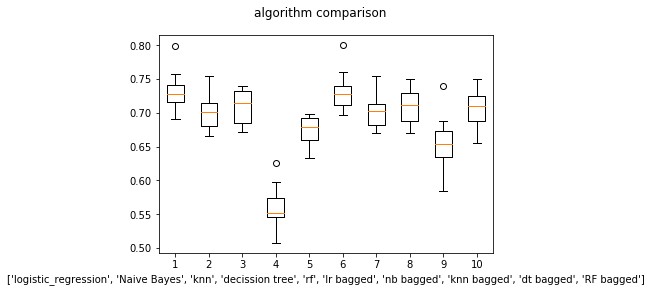

In [229]:
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_std,y_std,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

### running and adding the results of algo which need scaled data

# hypertuning for bagging classifier to find optimal n_estimator

In [230]:

from sklearn.ensemble import BaggingClassifier
lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=10)
nb_bag=BaggingClassifier(base_estimator=nb,n_estimators=10)
knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=10)
dt_bag=BaggingClassifier(base_estimator=dt,n_estimators=10)
rf_bag=BaggingClassifier(base_estimator=rf,n_estimators=10)

In [231]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':np.arange(1,50)}

gs_lr_bag=GridSearchCV(lr_bag,param_grid=params,scoring='roc_auc',cv=5)
gs_lr_bag.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                           

In [232]:
gs_lr_bag.best_params_

{'n_estimators': 13}

inference:
    this is based on roc_auc value. we can say when we use 34 estimators we get best roc_auc value. (this means less bias error)
    but we do bagging to decrease the variance error . hence, folow the below method

## method for finding optimal n_estimator for bagging

we are trying to find the least variance out of 100 estimators. which number of estimators gives least variance. 
this is passed to lr_bag=BaggingClassifier(base_estimator=lr,n_estimators='value from the graph')

In [236]:
auc_val=[]
for val in range(1,100):
    lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=val)
    result=cross_val_score(lr_bag,x_std,y_std,scoring='roc_auc',cv=5)
    auc_val.append(np.var(result,ddof=1))

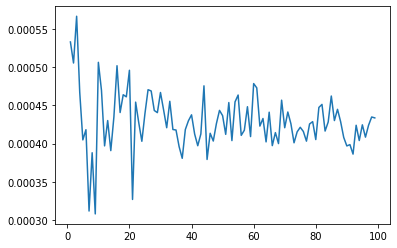

In [237]:
n_estimator=np.arange(1,100)
plt.plot(n_estimator,auc_val)
plt.show()

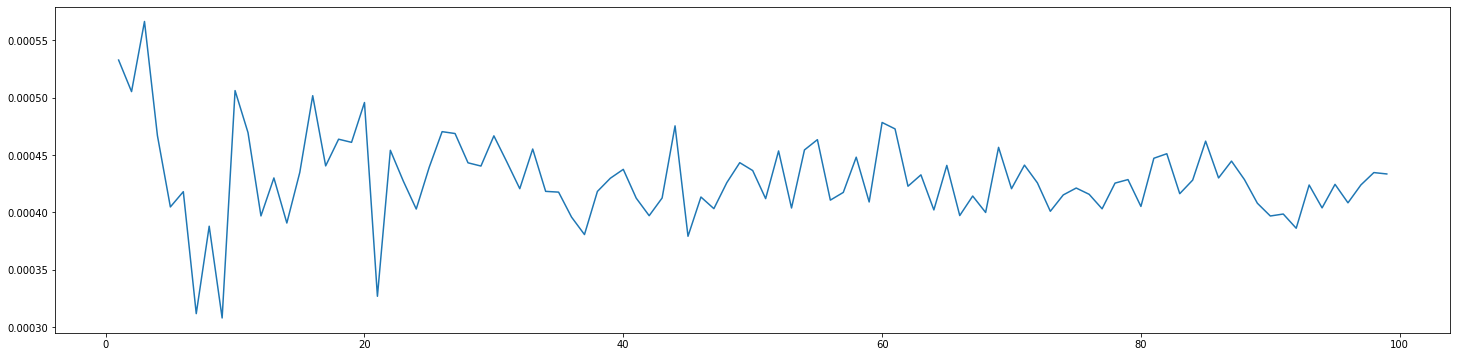

In [238]:
plt.figure(figsize=(25,6))
sns.lineplot(x=n_estimator,y=auc_val)
plt.show()

In [239]:
print(min(auc_val))

0.0003081661494849728


In [240]:
print(np.argmin(auc_val))    #shows the position(index) of the minimum value. which means n_estimator=8
                                #minimum gives the least variance error.

8


inference:
    for logistic regression, n_estimators is 8. like this, we have to find for each model and then run bagging one more time to get the best model

# boosting classifier (adaboost) for above classifiers

In [248]:
lr=LogisticRegression()
nb=BernoulliNB()
knn=KNeighborsClassifier(**gs_knn.best_params_)
dt=DecisionTreeClassifier(**gs_dt.best_params_)
rf=RandomForestClassifier(**gs_rf.best_params_)

#bagging classifiers
from sklearn.ensemble import BaggingClassifier
lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=10)
nb_bag=BaggingClassifier(base_estimator=nb,n_estimators=10)
knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=10)
dt_bag=BaggingClassifier(base_estimator=dt,n_estimators=10)
rf_bag=BaggingClassifier(base_estimator=rf,n_estimators=10)

#boosting classifiers
from sklearn.ensemble import AdaBoostClassifier
lr_boost=AdaBoostClassifier(base_estimator=lr,n_estimators=10)
nb_boost=AdaBoostClassifier(base_estimator=nb,n_estimators=10)
knn_boost=AdaBoostClassifier(base_estimator=knn,n_estimators=10)
dt_boost=AdaBoostClassifier(base_estimator=dt,n_estimators=10)
rf_boost=AdaBoostClassifier(base_estimator=rf,n_estimators=10)



In [249]:
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))

models.append(('lr bagged',lr_bag))
models.append(('nb bagged',nb_bag))
models.append(('knn bagged',knn_bag))
models.append(('dt bagged',dt_bag))
models.append(('RF bagged',rf_bag))

models.append(('lr boosted',lr_boost))
models.append(('nb boosted',nb_boost))
#models.append(('knn boosted',knn_boost))
models.append(('dt boosted',dt_boost))
models.append(('RF boosted',rf_boost))


logistic_regression:0.731311 (0.001000)
Naive Bayes:0.701377 (0.000744)
knn:0.708677 (0.000705)
decission tree:0.549955 (0.000438)
rf:0.663846 (0.001011)
lr bagged:0.730122 (0.000916)
nb bagged:0.701731 (0.000695)
knn bagged:0.710755 (0.000641)
dt bagged:0.660701 (0.001418)
RF bagged:0.700563 (0.000732)
lr boosted:0.732911 (0.001008)
nb boosted:0.713171 (0.000599)
dt boosted:0.555796 (0.001030)
RF boosted:0.658215 (0.001279)


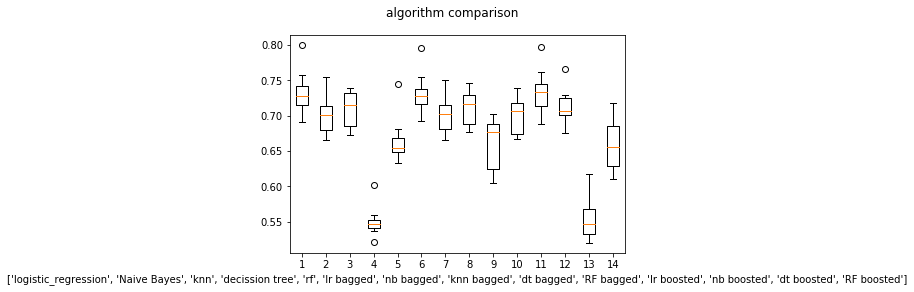

In [250]:
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_std,y_std,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

# method for finding optimal n_estimator for boosting

In boosting technique we know, it is trying to decrease the bias error, hence we take the mean of the cross_val_score results and we select the n_estimators which give highest mean. in bagging, we took least variance as bagging focusses on decreasing varinace error.

In [253]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
auc_val=[]
for val in range(1,100):
    lr_boost=AdaBoostClassifier(base_estimator=lr,n_estimators=val)
    result=cross_val_score(lr_boost,x_std,y_std,scoring='roc_auc',cv=5)
    auc_val.append(np.mean(result))

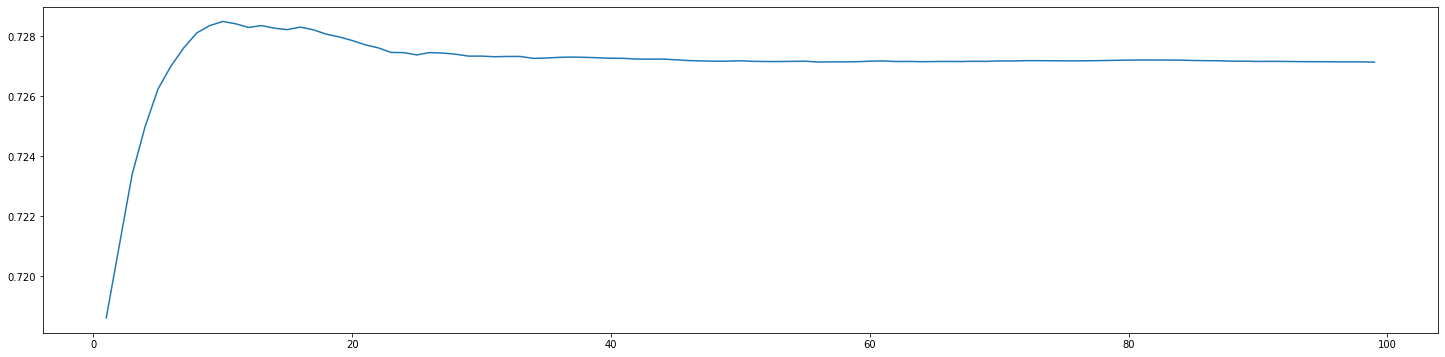

In [254]:
plt.figure(figsize=(25,6))
sns.lineplot(x=n_estimator,y=auc_val)
plt.show()

In [255]:
print(np.argmax(auc_val))

9


inference:
    for logistic regression, n_estimators is 9. like this, we have to find for each model and then run boosting one more time to get the best model

# Gradient Boosting classifer: 

In [256]:
lr=LogisticRegression()
nb=BernoulliNB()
knn=KNeighborsClassifier(**gs_knn.best_params_)
dt=DecisionTreeClassifier(**gs_dt.best_params_)
rf=RandomForestClassifier(**gs_rf.best_params_)

#bagging classifiers
from sklearn.ensemble import BaggingClassifier
lr_bag=BaggingClassifier(base_estimator=lr,n_estimators=10)
nb_bag=BaggingClassifier(base_estimator=nb,n_estimators=10)
knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=10)
dt_bag=BaggingClassifier(base_estimator=dt,n_estimators=10)
rf_bag=BaggingClassifier(base_estimator=rf,n_estimators=10)

#boosting classifiers
from sklearn.ensemble import AdaBoostClassifier
lr_boost=AdaBoostClassifier(base_estimator=lr,n_estimators=10)
nb_boost=AdaBoostClassifier(base_estimator=nb,n_estimators=10)
knn_boost=AdaBoostClassifier(base_estimator=knn,n_estimators=10)
dt_boost=AdaBoostClassifier(base_estimator=dt,n_estimators=10)
rf_boost=AdaBoostClassifier(base_estimator=rf,n_estimators=10)

from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier()

In [257]:
models=[]
models.append(('logistic_regression',lr))  
models.append(('Naive Bayes',nb))                    # #we need to scale the data before applying 
models.append(('knn',knn))                         #we need to scale the data.
models.append(('decission tree',dt))
models.append(('rf',rf))

models.append(('lr bagged',lr_bag))
models.append(('nb bagged',nb_bag))
models.append(('knn bagged',knn_bag))
models.append(('dt bagged',dt_bag))
models.append(('RF bagged',rf_bag))

models.append(('lr boosted',lr_boost))
models.append(('nb boosted',nb_boost))
#models.append(('knn boosted',knn_boost))
models.append(('dt boosted',dt_boost))
models.append(('RF boosted',rf_boost))
models.append(('gradient boost',gboost))

logistic_regression:0.731311 (0.001000)
Naive Bayes:0.701377 (0.000744)
knn:0.708677 (0.000705)
decission tree:0.556034 (0.001086)
rf:0.676809 (0.000550)
lr bagged:0.729412 (0.001000)
nb bagged:0.700908 (0.000718)
knn bagged:0.705504 (0.000856)
dt bagged:0.651276 (0.001420)
RF bagged:0.703474 (0.000856)
lr boosted:0.732911 (0.001008)
nb boosted:0.713171 (0.000599)
dt boosted:0.564459 (0.001137)
RF boosted:0.642367 (0.002213)
gradient boost:0.705027 (0.000605)


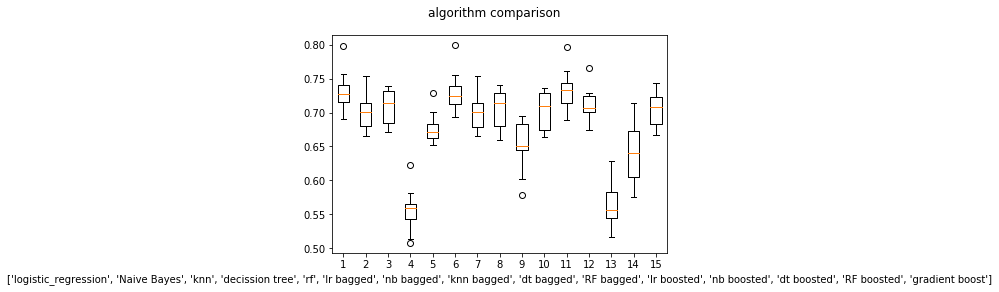

In [258]:
results=[]
names=[]
import warnings
for name,model in models:
    warnings.simplefilter('ignore')
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_std,y_std,cv=kfold,scoring='roc_auc') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison

fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.xlabel(names)
plt.boxplot(results)
plt.show()

# finding optimal number of estimators for gradient boost

oas this is boosting technique, bias error is focussed upon which has to be reduced. 
we take the mean of the cross_val_score results and we select the n_estimators which give highest mean.

In [259]:
auc_val=[]
for val in range(1,100):
    gboost=GradientBoostingClassifier(n_estimators=val)
    result=cross_val_score(gboost,x_std,y_std,scoring='roc_auc',cv=5)
    auc_val.append(np.mean(result))

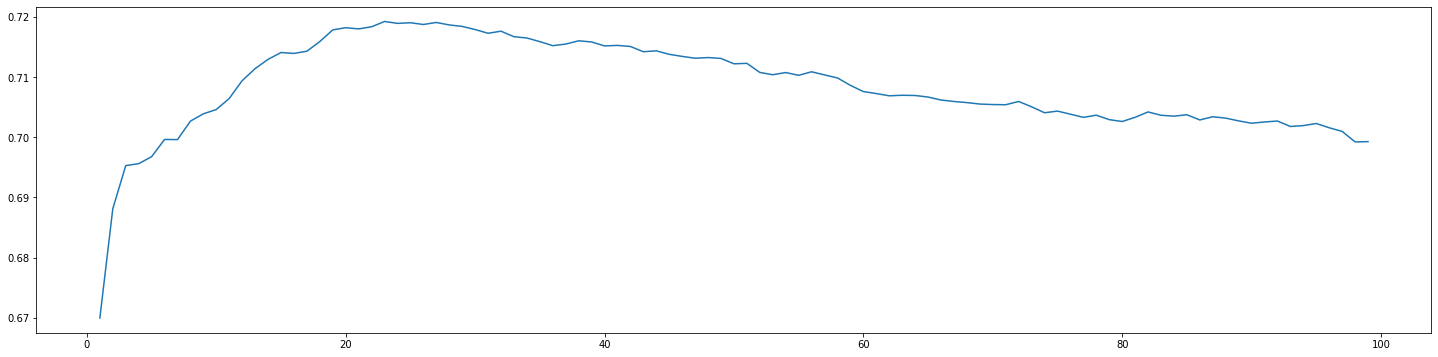

In [260]:
plt.figure(figsize=(25,6))
sns.lineplot(x=n_estimator,y=auc_val)
plt.show()

In [261]:
print(np.argmax(auc_val))

22


this optimal number of n_estimators should be passed as hyperparameter

In [262]:
gboost=GradientBoostingClassifier(n_estimators=22)
kfold=KFold(shuffle=True,n_splits=10,random_state=1)
cv_results=cross_val_score(gboost,x_std,y_std,cv=kfold,scoring='roc_auc')

In [264]:
cv_results.mean()

0.7185630724615356

In [265]:
cv_results.var()

0.0006970250004995061

# new dataset-IRIS- Naive Bayes classifier

In [78]:
df=sns.load_dataset(name='iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
df.shape

(150, 5)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [81]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [90]:
df['species']=df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})

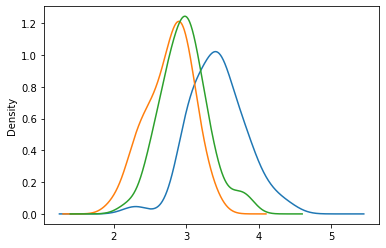

In [103]:
df[df['species']==0]['sepal_width'].plot(kind='kde')

df[df['species']==1]['sepal_width'].plot(kind='kde')

df[df['species']==2]['sepal_width'].plot(kind='kde')
plt.show()

In [ ]:
kfold=KFold(shuffle=True,n_splits=10,random_state=1)
cv_results=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')